<a href="https://colab.research.google.com/github/akshayt1998/akshay_ml_projects/blob/main/LearningBasics/Torch/NN_with_torch/nn_with_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import torch
import numpy as np

In [11]:
nn = torch.nn
import torch.nn.functional as F

In [51]:
class NNModel(nn.Module):

    def __init__(self, input_features, hidden_layer_1, hidden_layer_2, out_features):
      super().__init__()
      self.fc1 = nn.Linear(input_features, hidden_layer_1)
      self.fc2 = nn.Linear(hidden_layer_1, hidden_layer_2)
      self.out = nn.Linear(hidden_layer_2, out_features)
    def forward(self, x): # passes the x datapoint through the layers
      x = F.relu(self.fc1(x)) # apply the activation function on the Ne
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [52]:
model = NNModel(4,6,2,3)

In [53]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [54]:
my_df['variety_codes'] = my_df['variety'].astype('category').cat.codes

In [55]:
# Df needs to be broken down in values
X = my_df.iloc[:,:4].values
y = my_df.iloc[:,5].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=21)

In [57]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [58]:
y_train

tensor([0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2,
        1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0,
        2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2,
        0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2,
        0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1])

In [59]:
# Define evaluation criterion / loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [60]:
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'{i+1}. Training Loss for pass {i+1} is {loss.item()}')
  optimizer.zero_grad() # sets gradient to zero
  loss.backward() # calculates the new gradient
  optimizer.step() # adjusts model parameters based on the gradient collected in the prev. step




1. Training Loss for pass 1 is 1.1018153429031372
11. Training Loss for pass 11 is 1.043745517730713
21. Training Loss for pass 21 is 0.8923102617263794
31. Training Loss for pass 31 is 0.6701714396476746
41. Training Loss for pass 41 is 0.47283369302749634
51. Training Loss for pass 51 is 0.3371349275112152
61. Training Loss for pass 61 is 0.24845576286315918
71. Training Loss for pass 71 is 0.17662686109542847
81. Training Loss for pass 81 is 0.12533263862133026
91. Training Loss for pass 91 is 0.09392454475164413
101. Training Loss for pass 101 is 0.07513626664876938
111. Training Loss for pass 111 is 0.06346840411424637
121. Training Loss for pass 121 is 0.05578206852078438
131. Training Loss for pass 131 is 0.05039501190185547
141. Training Loss for pass 141 is 0.04641483724117279
151. Training Loss for pass 151 is 0.0433351993560791
161. Training Loss for pass 161 is 0.04086138308048248
171. Training Loss for pass 171 is 0.03881509229540825
181. Training Loss for pass 181 is 0.03

Text(0, 0.5, 'Loss')

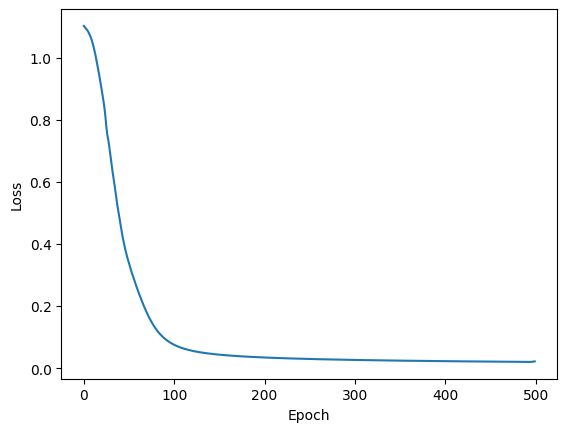

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [68]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


correct = 0
for i, data in enumerate(X_test):
  y_val = model.forward(data)
  if y_val.argmax().item() == y_test[i].item():
    print(f'Predicted value is {y_val.argmax().item()} \t actual value is {y_test[i].item()}')
    correct+=1
print(f'Total Correct classified predicitons are: {str(correct)} out of {str(len(y_test))}')

Predicted value is 1 	 actual value is 1
Predicted value is 0 	 actual value is 0
Predicted value is 0 	 actual value is 0
Predicted value is 0 	 actual value is 0
Predicted value is 1 	 actual value is 1
Predicted value is 1 	 actual value is 1
Predicted value is 0 	 actual value is 0
Predicted value is 2 	 actual value is 2
Predicted value is 0 	 actual value is 0
Predicted value is 0 	 actual value is 0
Predicted value is 1 	 actual value is 1
Predicted value is 1 	 actual value is 1
Predicted value is 2 	 actual value is 2
Predicted value is 2 	 actual value is 2
Predicted value is 0 	 actual value is 0
Predicted value is 1 	 actual value is 1
Predicted value is 2 	 actual value is 2
Predicted value is 1 	 actual value is 1
Predicted value is 0 	 actual value is 0
Predicted value is 2 	 actual value is 2
Predicted value is 2 	 actual value is 2
Predicted value is 1 	 actual value is 1
Predicted value is 1 	 actual value is 1
Predicted value is 0 	 actual value is 0
Predicted value 